In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from tensorflow.keras import models, Input, layers
from tensorflow.keras import regularizers
from keras import optimizers, losses
from tensorflow.keras.metrics import CategoricalCrossentropy, CategoricalAccuracy

In [2]:
print('List of Physical Devices :\n', tf.config.experimental.list_physical_devices())
GPUs = tf.config.experimental.list_physical_devices('GPU')
for GPU in GPUs:
    tf.config.experimental.set_memory_growth(GPU,True)

List of Physical Devices :
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
GPUs

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
os.path.join('Data','Cats & Dogs','Cats & Dogs','dataset','training_set')

'Data\\Cats & Dogs\\Cats & Dogs\\dataset\\training_set'

In [5]:
dir = os.path.join('Data','Cats & Dogs','Cats & Dogs','dataset','training_set')
data = tf.keras.utils.image_dataset_from_directory(dir)
data_iterator = data.as_numpy_iterator()

Found 8000 files belonging to 3 classes.


In [6]:
batch = data_iterator.next()
batch[1]

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1])

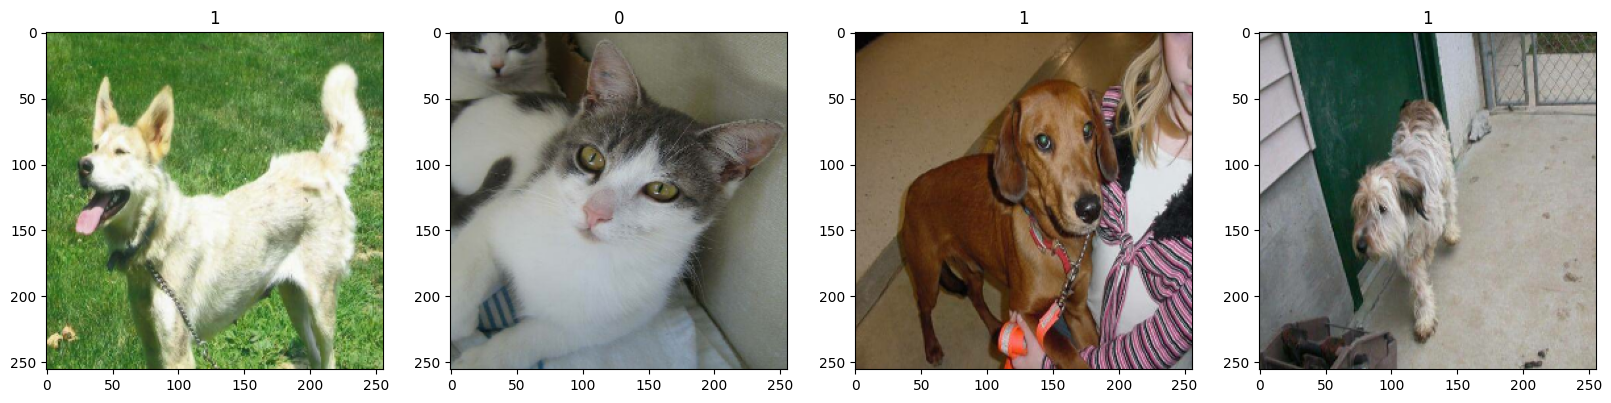

In [7]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [8]:
Data = data.map(lambda x, y: (x/255,y))

In [9]:
Data

<MapDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [10]:
print('Size of Data: ', len(Data))
print('Size of Training Data: ', len(Data)*0.7)
print('Size of Validation Data: ', len(Data)*0.2)
print('Size of Test Data: ', len(Data)*0.1)

Size of Data:  250
Size of Training Data:  175.0
Size of Validation Data:  50.0
Size of Test Data:  25.0


In [11]:
train_size = int(len(Data)*0.7)
val_size = int(len(Data)*0.2)
test_size = int(len(Data)*0.1)
Train = Data.take(train_size)
Val = Data.skip(train_size).take(val_size)
Test = Data.skip(train_size+val_size).take(test_size)

In [12]:
# Train = np.zeros((8000,254,254,3))
# c = 0
# for f in os.listdir('..\A-Machine Learning\Image Processing\dogs and cats'):
#     img = cv2.imread('..\A-Machine Learning\Image Processing\dogs and cats\\'+f)
#     nimg = cv2.resize(img, (254,254))
#     Train[c,:,:,:] = nimg/255.00
#     c = c+1
# Y_Train = np.zeros(8000)
# Y_Train[0:3999] = 0
# Y_Train[4000:8000] = 1

In [13]:
# KR = regularizers.L1L2(l1=1e-5, l2=1e-4)
# BR = regularizers.L2(1e-4)
# AR = regularizers.L2(1e-5)

In [51]:
mdl = tf.keras.Sequential()
mdl.add(Input(shape=(256,256,3)))
mdl.add(layers.Conv2D(16,(3,3), activation='relu'))
mdl.add(layers.MaxPool2D())
mdl.add(layers.Conv2D(32,(3,3), activation='relu'))
mdl.add(layers.MaxPool2D())
mdl.add(layers.Conv2D(16,(3,3), activation='relu'))
mdl.add(layers.MaxPool2D())
mdl.add(layers.Flatten())
mdl.add(layers.Dropout(0.2))
mdl.add(layers.Dense(256, activation="relu"))
mdl.add(layers.Dropout(0.2))
mdl.add(layers.Dense(16, activation="relu"))
mdl.add(layers.Dropout(0.1))
mdl.add(layers.Dense(8, activation="relu"))
mdl.add(layers.Dense(1, activation='sigmoid'))
mdl.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 30, 30, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 14400)            

In [52]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=os.path.join('Data','Cats & Dogs','Cats & Dogs','dataset','training_set','logs'))

In [53]:
OPT = tf.keras.optimizers.Adam()
LO = losses.BinaryCrossentropy()
MET = ['accuracy']

In [54]:
mdl.compile(optimizer=OPT, loss=LO, metrics=MET)

In [55]:
hist = mdl.fit(Train, validation_data=Val, epochs=10, callbacks=[tensorboard_callback])

Epoch 1/10
175/175 [==============================] - 24s 131ms/step - loss: 0.6930 - accuracy: 0.5214 - val_loss: 0.6918 - val_accuracy: 0.5025
Epoch 2/10
175/175 [==============================] - 22s 124ms/step - loss: 0.6851 - accuracy: 0.5359 - val_loss: 0.6819 - val_accuracy: 0.5419
Epoch 3/10
175/175 [==============================] - 27s 155ms/step - loss: 0.6600 - accuracy: 0.5959 - val_loss: 0.6306 - val_accuracy: 0.6488
Epoch 4/10
175/175 [==============================] - 22s 125ms/step - loss: 0.6240 - accuracy: 0.6614 - val_loss: 0.6223 - val_accuracy: 0.6706
Epoch 5/10
175/175 [==============================] - 26s 147ms/step - loss: 0.5841 - accuracy: 0.6900 - val_loss: 0.6271 - val_accuracy: 0.6637
Epoch 6/10
175/175 [==============================] - 35s 197ms/step - loss: 0.5231 - accuracy: 0.7352 - val_loss: 0.6390 - val_accuracy: 0.6862
Epoch 7/10
175/175 [==============================] - 24s 128ms/step - loss: 0.4042 - accuracy: 0.8143 - val_loss: 0.6267 - val_ac

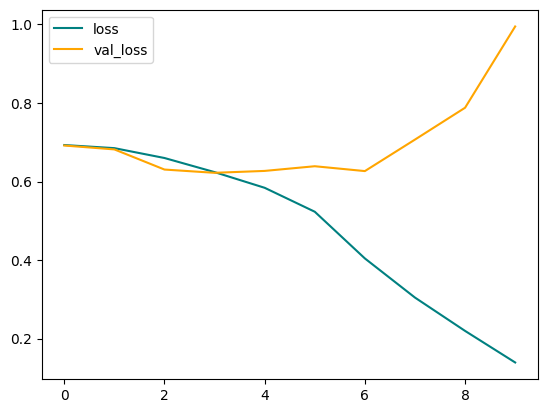

In [56]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.legend(loc="upper left")
plt.show()

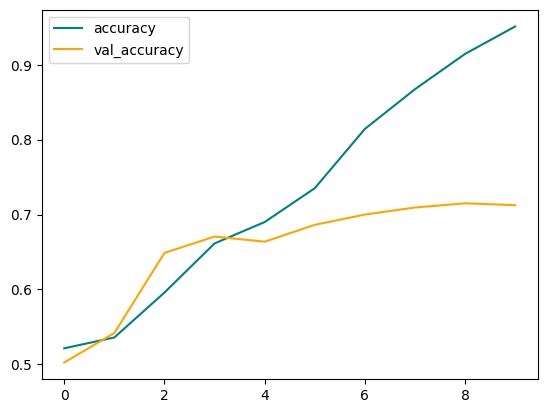

In [57]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.legend(loc="upper left")
plt.show()

In [58]:
pre = tf.keras.metrics.Precision()
rec = tf.keras.metrics.Recall()
acc = tf.keras.metrics.Accuracy()

In [59]:
for batch in Test.as_numpy_iterator():
    X, y = batch
    Y = mdl.predict(X)
    pre.update_state(y,Y)
    rec.update_state(y,Y)
    acc.update_state(y,Y)

In [60]:
print('Binary Accuracy: ', acc.result().numpy())
print('Precision: ', pre.result().numpy())
print('Recall: ', rec.result().numpy())

Binary Accuracy:  0.00625
Precision:  0.7211796
Recall:  0.6625616
